# Beat the ATS - Project Description

###### According to Jobscan, 99% of Fortune 500 companies use an Applicant Tracking System (ATS) as their recruitment strategy.
###### All ATS' store candidates' information by using keywords, so it's easy to parse and filter them.
###### If applicant's resume does not meet certain criteria, it is either flagged or auto-rejected.
###### "Beat the ATS" Project aims to analyse the most popular tools and skills (keywords) for Data Analytics field and check if there is a relationship between those skills and earnings.

## Research Questions:
<b>All research questions are based on years 2020-2021 in the United States of America</b>
<br><br>
###### 1. What were the most popular technologies employers sought in Data Analytics field in the period 2020-2021? (Frequency analysis)
###### 2. What were the most popular tools employers sought? (Frequency analysis)
###### 3. What were the most popular soft skills? (Frequency analysis)
###### 4. Is there a relationship between education level and earnings? If yes, what is the relationship? (Regression analysis)
###### 5. Is there a relationship between years of experience and earnings? If yes, what is the relationship? (Regression analysis)
<br><br>
### Hypotheses:
###### 1. There are certain technologies that are more sought after than others.
###### 2. There are certain tools that are more sought after than others.
###### 3. There are certain soft skills that are sought after by employers.
###### 4. There is a correlation between education level and earnings.
###### 5. There is a correlation between experience level (measured in years) and earnings.


In [383]:
%matplotlib notebook

In [391]:
%matplotlib inline

In [392]:
# Import Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [393]:
# Declare variables and import the data
# job_descriptions = pd.read_csv("Job descriptions.csv")
# salary_education_experience = pd.read_csv("salary vs education vs experience.csv")
job_desc_df = pd.read_csv("salary_education_experience.csv")

# Finding the relationship between years of experience and earnings

In [394]:
new_df = job_desc_df.rename(columns = {'Annual Salary':'Annual_Salary', 'Years of Experience':'Years_of_Experience', 'Job Title':'Job_Title'})
new_df

,Year,Compant,Job_Title,Annual_Salary,Location,Years_of_Experience,Gender,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College,Education
0,2020,PwC,Business Analyst,115000,"Los Angeles, CA",5,Female,1,0,0,0,0,Master's Degree
1,2020,Fractal Analytics,Data Scientist,85000,"Bangalore, KA, India",4,Male,0,1,0,0,0,Bachelor's Degree
2,2020,Microsoft,Data Scientist,156000,"Seattle, WA",2,Male,0,0,1,0,0,PhD
3,2020,PwC,Business Analyst,25000,"Moscow, MC, Russia",8,Female,1,0,0,0,0,Master's Degree
4,2020,SAP,Business Analyst,41000,"Toronto, ON, Canada",2,Male,0,1,0,0,0,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,2020,Twitter,Business Analyst,89000,"San Francisco, CA",1,Female,0,1,0,0,0,Bachelor's Degree
1800,2020,Accenture,Business Analyst,90000,"Detroit, MI",1,Male,0,1,0,0,0,Bachelor's Degree
1801,2020,Bill.com,Data Scientist,110000,"Houston, TX",0,Male,0,1,0,0,0,Bachelor's Degree
1802,2020,JP Morgan Chase,Data Scientist,132000,"New York, NY",0,Male,1,0,0,0,0,Master's Degree


In [395]:
#Calculating the Average of Annual Salary 
Average_Annual_Salary = new_df["Annual_Salary"].mean()

In [396]:
Average_Annual_Salary

176344.23503325944

In [397]:
# Calculating the Highest Annual Salary 
Max_Average_Annual_Salary = new_df["Annual_Salary"].max()

In [398]:
Max_Average_Annual_Salary

1000000

In [399]:
# Calculating the Highest Years of Experience 
Max_Years_of_Experience = new_df["Years_of_Experience"].max()

In [400]:
Max_Years_of_Experience

45

In [402]:
# Calculating the Annual Salary based on Years of Experience in relation to Job Title
new_df.groupby(["Years_of_Experience", "Job_Title"])["Annual_Salary"].max()

Years_of_Experience  Job_Title       
0                    Business Analyst     130000
                     Data Scientist       388000
1                    Business Analyst     123000
                     Data Scientist       294000
2                    Business Analyst     190000
                     Data Scientist       467000
3                    Business Analyst     204000
                     Data Scientist       525000
4                    Business Analyst     231000
                     Data Scientist       550000
5                    Business Analyst     270000
                     Data Scientist       605000
6                    Business Analyst     250000
                     Data Scientist       630000
7                    Business Analyst     340000
                     Data Scientist       645000
8                    Business Analyst     405000
                     Data Scientist       650000
9                    Business Analyst     305000
                     Data Scien

Text(0, 0.5, 'Annual Salary')

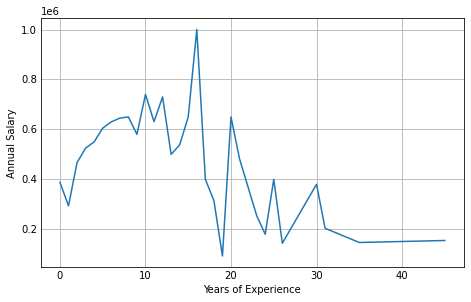

In [412]:
# Comparing Highest Years of Experience with Highest Annual Salary
new_df.groupby(["Years_of_Experience"])["Annual_Salary"].max().plot()
plt.xlabel("Years of Experience")
plt.ylabel("Annual Salary")

Text(0, 0.5, 'Annual Salary')

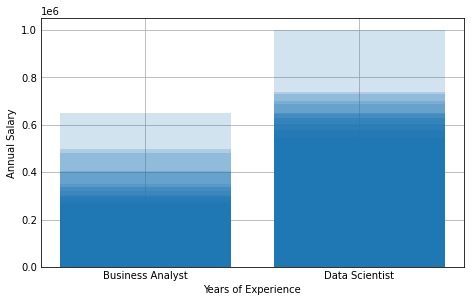

In [410]:
# Plotting to show the Annual Salary range based on Job Titles
x_axis = new_df["Job_Title"]
y_axis = new_df['Annual_Salary']

plt.bar(x_axis, y_axis, alpha=0.2, align='center')

current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in new_df['Annual_Salary']])
plt.xlabel("Years of Experience")
plt.ylabel("Annual Salary")

In [288]:
new_df[new_df.Years_of_Experience == 45].Annual_Salary.value_counts()

155000    1
Name: Annual_Salary, dtype: int64

In [381]:
#Showing the country with highest number recruits
ar = new_df.groupby(new_df.Location).Job_Title.value_counts()
ar.head(60)

Location                       Job_Title       
Alexandria, VA                 Data Scientist       1
Alpharetta, GA                 Data Scientist       1
Amsterdam, NH, Netherlands     Data Scientist      14
                               Business Analyst     3
Ann Arbor, MI                  Data Scientist       1
Antioch, TN                    Data Scientist       1
Arizona City, AZ               Business Analyst     2
                               Data Scientist       2
Arlington, VA                  Data Scientist      11
                               Business Analyst     4
Armonk, NY                     Data Scientist       4
Atlanta, GA                    Data Scientist      18
                               Business Analyst     3
Augusta, GA                    Business Analyst     1
Austin, TX                     Data Scientist      20
                               Business Analyst    12
Bangalore, KA, India           Data Scientist      24
                               Bus

In [359]:
# Showing the value of Annual Salary based on the Years of Experience
new_df.groupby(new_df.Annual_Salary).Years_of_Experience.count()

Annual_Salary
10000      1
11000      1
12000      2
13000      1
14000      4
          ..
690000     1
700000     1
730000     1
740000     1
1000000    1
Name: Years_of_Experience, Length: 367, dtype: int64

Text(0, 0.5, 'Years of Experience')

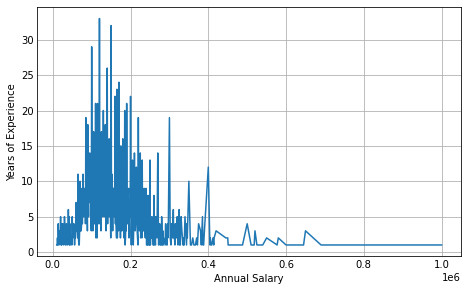

In [408]:
# Plotting to show the value of Annual Salary based on the Years of Experience
new_df.groupby(new_df.Annual_Salary).Years_of_Experience.count().plot()
plt.xlabel("Annual Salary")
plt.ylabel("Years of Experience")

Text(0, 0.5, 'Annual Salary')

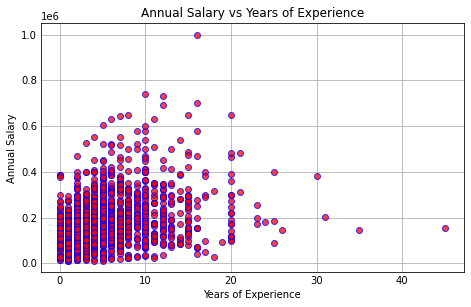

In [414]:
#Plotting a scatter graph to show the relationship between Annual Salary and Years of Experience
yrs_exp=new_df["Years_of_Experience"]
ann_sal = new_df["Annual_Salary"]
plt.scatter(yrs_exp, ann_sal, marker= "o", color="red", alpha=0.75,edgecolors="blue")
plt.title("Annual Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Annual Salary")


In [342]:
#Calculating the correlation coefficient between mouse weight and average tumor volume
print(f"The correlation coefficient between Annual Salary and Years of Experience is {round(st.pearsonr(yrs_exp, ann_sal)[0],2)}")

The correlation coefficient between Annual Salary and Years of Experience is 0.32


In [343]:
# Calculating the Regression
regression = np.polyfit(annual_salary,years_of_exp, deg= 1)
regression

array([1.38007589e-05, 2.82684788e+00])

Text(0, 0.5, 'Years of Experience')

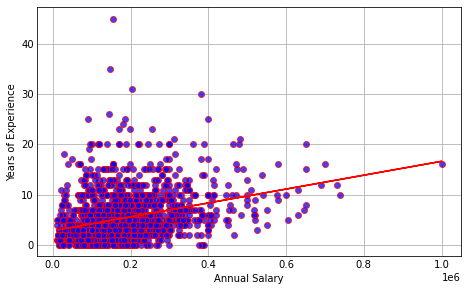

In [416]:
# Plotting the trend line
trend = np.polyval(reg, annual_salary)
plt.scatter(annual_salary,years_of_exp, marker= "o", color="blue", alpha=0.75,edgecolors="red")
plt.plot(annual_salary, trend, 'r')
plt.xlabel("Annual Salary")
plt.ylabel("Years of Experience")

In [ ]:
# Clean the data
# Drop N/A where relevant (not relevant in the context of education!!!)
# Words spelled differently, aggregate words for the same meaning
# Address encoding problems: convert all job descriptions to UTF-8 using unicode_escape, pandas ignore encoding)

In [62]:
# Searching for keywords:
# Stop words removal
# Count the frequency using CountVectorizer
# Produce counts
# Define words matrix
def words_matrix(words, vectorizer):
    matrix = vectorizer.fit_transform(words)

In [70]:
text = ['Hello, my my my name is Rita and and I am a data scientist.']
text2 = ['This is a vectorizer test']

In [71]:
vec = CountVectorizer()
x = vec.fit_transform(text)
print(x)

  (0, 3)	1
  (0, 5)	3
  (0, 6)	1
  (0, 4)	1
  (0, 7)	1
  (0, 1)	2
  (0, 0)	1
  (0, 2)	1
  (0, 8)	1


In [ ]:
# Create a visualisation for keywords

In [ ]:
# Calculate Measures of Central Tendency - mean, median, mode for education
# example_array = np.array([24, 16, 12, 10, 12, 28, 38, 12, 28, 24])
# example_mode = stats.mode(example_array)
# If there are multiple modes, the stats.mode() function will always return the smallest mode in the dataset.

In [ ]:
# Create a visualisation for education

In [ ]:
# Calculate Measures of Central Tendency - mean, median, mode for experience

In [ ]:
# Create a visualisation for experience

In [ ]:
# Calculate Measures of Central Tendency - mean, median, mode for earnings

In [ ]:
# Create a visualisation for earnings

In [ ]:
# Perform regression analysis for education and earnings

In [ ]:
# Create a visualisation for regression analysis: education vs earnings

In [ ]:
# Perform regression analysis for experience and earnings

In [ ]:
# Create a visualisation for regression analysis: experience vs earnings

In [ ]:
# We can define the Student t-test as a method that tells us how significant the differences can be between different groups.
# A Student t-test is defined as a statistic and this is used to compare the means of two different populations.
# t-test: stats.ttest_1samp(X, mean)
# Independent t-test: stats.ttest_ind(X,Y)

In [ ]:
# Create a visualisation for t-test